## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
#mouse_metadata 249x5

In [3]:
#study_results 1893x4

# surveyed the data sets and see that Mouse ID is that common column in which we'd like to merge 

In [4]:
mouse_study_merge = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

In [5]:
# Display the data table for preview

In [6]:
mouse_study_merge.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice.

In [8]:
mice_count_all = mouse_study_merge['Mouse ID'].count()
mice_count_all

1893

In [9]:
mice_count = mouse_study_merge['Mouse ID'].unique()
mice_count_unique = len(mice_count)
mice_count_unique

249

In [10]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
####duplicate_init = mouse_study_merge.groupby(['Mouse ID']).count()['Timepoint']
####duplicate_init

duplicates_init = mouse_study_merge.sort_values('Mouse ID')
#duplicates_init
len(duplicates_init)

1893

In [11]:
timepoint_duplicates = duplicates_init.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
len(timepoint_duplicates)

#looks to be successful, as this dropped 5/10 rows -- I'm not sure wheather to pick first, last, keep=False drops all Duplicate rows.

1888

In [12]:
# Optional: Get all the data for the duplicate mouse ID. 

In [13]:
duplicated_timepoints = mouse_study_merge[mouse_study_merge.duplicated()]
duplicated_timepoints

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [14]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [15]:
# Checking the number of mice in the clean DataFrame.
## should be 1888 line items and 249 unique mice here....

In [16]:
clean_data = timepoint_duplicates

In [17]:
len(clean_data)

1888

## Summary Statistics

In [18]:
drug_regimen = clean_data.groupby('Drug Regimen')
#drug_regimen_tumor_vol = drug_regimen.loc['Tumor Volume(mm3)']

drug_regimen
# drug_reg_counts = drug_regimen.count()


In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

t_vol_mean = drug_regimen['Tumor Volume (mm3)'].mean()
t_vol_median = drug_regimen['Tumor Volume (mm3)'].median()
t_vol_variance = drug_regimen['Tumor Volume (mm3)'].var()
t_vol_std_dev = drug_regimen['Tumor Volume (mm3)'].std()

# This method is the most straighforward, creating multiple series and putting them all together at the end.

t_vol_stats = pd.DataFrame({'Tumor Size Mean': round(t_vol_mean,3), 
                           'Tumor Size Median': round(t_vol_median,3),
                           'Tumor Size Variance': round(t_vol_variance,3),
                           'Tumor Size Std Dev': round(t_vol_std_dev,3)
                           })
t_vol_stats


#################### NEED TO FINISH STANDARD ERROR

,Tumor Size Mean,Tumor Size Median,Tumor Size Variance,Tumor Size Std Dev
Drug Regimen,,,,
Capomulin,40.676,41.558,24.948,4.995
Ceftamin,52.591,51.776,39.290,6.268
Infubinol,52.885,51.821,43.129,6.567
Ketapril,55.236,53.699,68.554,8.280
Naftisol,54.332,52.509,66.173,8.135
Placebo,54.034,52.289,61.168,7.821
Propriva,52.389,50.910,43.116,6.566
Ramicane,40.217,40.673,23.487,4.846
Stelasyn,54.233,52.432,59.451,7.710


In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

drug_regimen2 = clean_data.groupby('Drug Regimen')

t_vol_stats2 = pd.DataFrame({'Tumor Size Mean': round(drug_regimen2['Tumor Volume (mm3)'].mean(),3),
              'Tumor Size Median': round(drug_regimen2['Tumor Volume (mm3)'].mean(),3),
              'Tumor Size Variance': round(drug_regimen2['Tumor Volume (mm3)'].mean(),3),
              'Tumor Size Std Dev': round(drug_regimen2['Tumor Volume (mm3)'].mean(),3),
               })
t_vol_stats2
# This method produces everything in a single groupby function



################### NEED TO FINISH STANDARD ERROR

,Tumor Size Mean,Tumor Size Median,Tumor Size Variance,Tumor Size Std Dev
Drug Regimen,,,,
Capomulin,40.676,40.676,40.676,40.676
Ceftamin,52.591,52.591,52.591,52.591
Infubinol,52.885,52.885,52.885,52.885
Ketapril,55.236,55.236,55.236,55.236
Naftisol,54.332,54.332,54.332,54.332
Placebo,54.034,54.034,54.034,54.034
Propriva,52.389,52.389,52.389,52.389
Ramicane,40.217,40.217,40.217,40.217
Stelasyn,54.233,54.233,54.233,54.233


## Bar and Pie Charts

In [21]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 



In [22]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
regimen_count = clean_data.groupby('Drug Regimen')
mice_ID_list = regimen_count['Drug Regimen'].unique()
#mice_ID_list

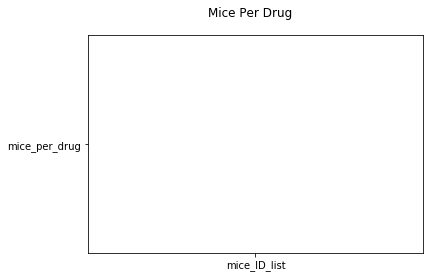

In [30]:
mice_per_drug = regimen_count.count()['Mouse ID']
#mice_per_drug
#type(mice_per_drug) <-- this is a series 

#### some useful stuff here:
# data = {'a': np.arange(50),
#         'c': np.random.randint(0, 50, 50),
#         'd': np.random.randn(50)}
# data['b'] = data['a'] + 10 * np.random.randn(50)
# data['d'] = np.abs(data['d']) * 100

# plt.scatter('a', 'b', c='c', s='d', data=data)
# plt.xlabel('entry a')
# plt.ylabel('entry b')
# plt.show()




drugs = ['mice_ID_list']
values = ['mice_per_drug']

# plt.figure(figsize=(9, 3))

plt.bar(drugs, values)
#plt.subplot(132)
plt.suptitle('Mice Per Drug')
plt.show()

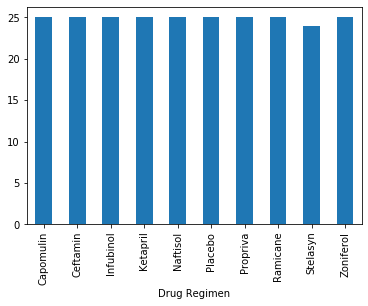

In [34]:
clean_data.groupby('Drug Regimen')['Mouse ID'].nunique().plot(kind='bar')
plt.show()

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
